# Подготовка данных

In [16]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

with zipfile.ZipFile('flowers-recognition.zip', 'r') as zip_ref:
    zip_ref.extractall('flowers-recognition')

path = 'flowers-recognition/flowers'
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

def load_images(data_dir, classes):
    images = []
    labels = []
    for cl in classes:
        class_path = os.path.join(data_dir, cl)
        for img in os.listdir(class_path):
            img_path = os.path.join(class_path, img)
            img = Image.open(img_path).resize((224, 224))  
            img = np.array(img)  
            img = preprocess_input(img) 
            images.append(img)
            labels.append(cl)
    return np.array(images), np.array(labels)

images, labels = load_images(path, classes)

# Обучение модели

In [20]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

# Извлечение признаков
def extract_features(img_array, model):
    features = model.predict(img_array)
    features = features.reshape(features.shape[0], -1)
    return features

X_train_features = extract_features(X_train, model)
X_test_features = extract_features(X_test, model)

neighbors = NearestNeighbors(n_neighbors=5, metric='cosine')
neighbors.fit(X_train_features)

# Функция для поиска наиболее похожих изображений
def find_similar_images(query_img, model, neighbors):
    query_features = extract_features(query_img, model)
    distances, indices = neighbors.kneighbors(query_features)
    return distances, indices

95/95 ━━━━━━━━━━━━━━━━━━━━ 462s 5s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 194s 5s/step


# Пример работы модели

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.45364705..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48109803..0.5374941].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].


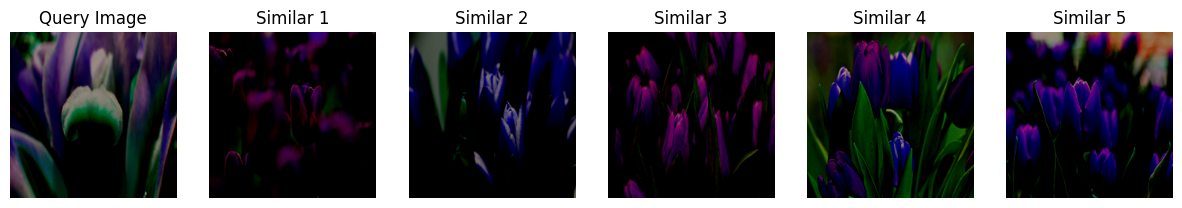

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.51498044].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5342].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.58455294].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].


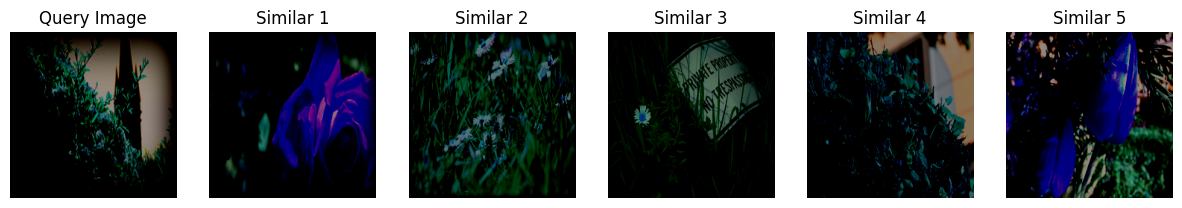

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.56886667].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.57278824].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].


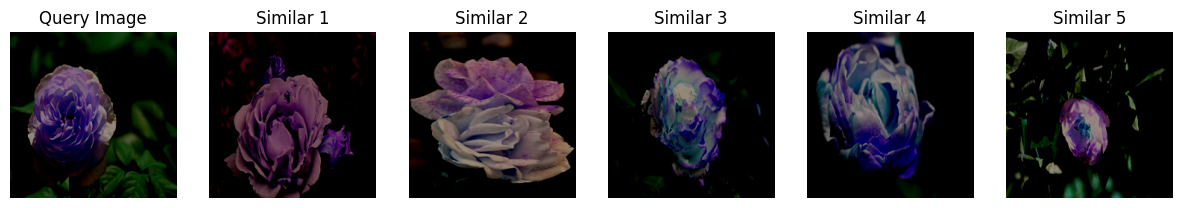

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.54204315].


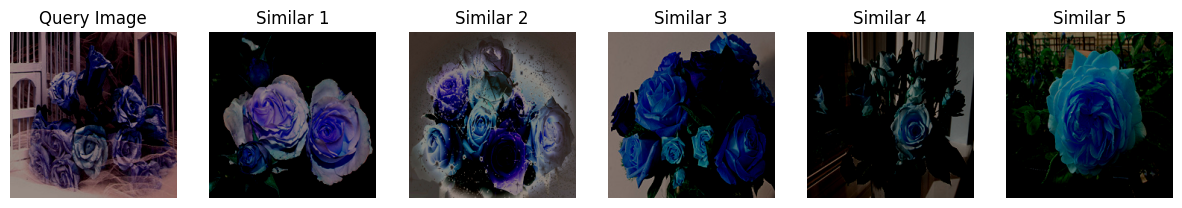

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.57278824].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.54204315].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.55710196].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.45403528..0.51498044].


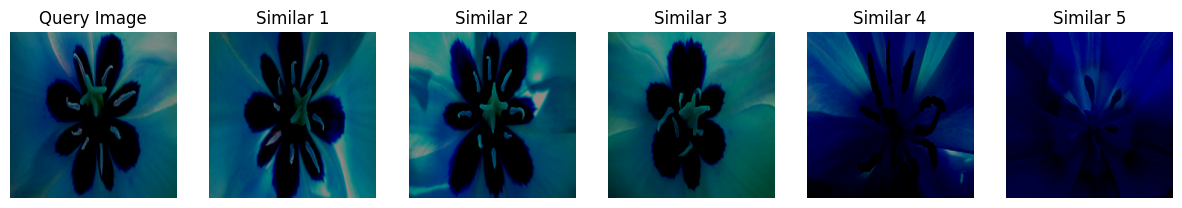

In [21]:
def display_similar_images(query_img, similar_indices, X_train):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 6, 1)
    plt.imshow(query_img[0] / 255.0)
    plt.title('Query Image')
    plt.axis('off')

    for i, idx in enumerate(similar_indices[0]):
        plt.subplot(1, 6, i+2)
        plt.imshow(X_train[idx] / 255.0)
        plt.title(f'Similar {i+1}')
        plt.axis('off')
    plt.show()

# Тестирование на 5 случайных изображениях из тестовой выборки
for i in range(5):
    query_img = X_test[i:i+1]
    distances, indices = find_similar_images(query_img, model, neighbors)
    display_similar_images(query_img, indices, X_train)